In [1]:
import pickle
import sys

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

sys.path.append('../../../src')
import raybay

In [2]:
# Load treatment plan results
result = np.load('res_linear_dummy_minimize.pkl', allow_pickle=True)

In [4]:
# Reload goal and function dataframes (doesn't save correctly from remote)
result.goal_df = pd.read_csv('../goals.csv') 
result.func_df = pd.read_csv('funcs.csv')
pickle.dump(result, open('res_linear_dummy_minimize.pkl', 'wb'))

In [5]:
# Clinical goals
result.goal_df

,Roi,Type,GoalCriteria,AcceptanceLevel,ParameterValue
0,Chestwall_L,MaxDvh,AtMost,3000,2.04
1,D2cm,MaxDose,AtMost,2400,NaN
2,Esophagus,MaxDvh,AtMost,1880,16.91
3,Lungs,MaxDvh,AtMost,1160,29.19
4,Lungs,MaxDvh,AtMost,1240,19.46
5,PTV,MinDvh,AtLeast,4800,95.00
6,PTV,MaxDose,AtMost,8000,NaN
7,Rib,MaxDvh,AtMost,3200,0.27
8,Rib,MaxDose,AtMost,4000,NaN
9,SpinalCanal,MaxDvh,AtMost,1360,2.30


In [6]:
# Constituent functions
result.func_df

,Roi,FunctionType,DoseLevel,PercentVolume,EudParameterA,Weight
0,Chestwall_L,MaxDvh,"[0,3000]",2.04,NaN,1
1,D2cm,MaxDose,"[0,2400]",0.00,NaN,1
2,Esophagus,MaxDvh,"[0,1880]",16.91,NaN,1
3,Lungs,MaxDvh,"[0,1160]",29.19,NaN,1
4,Lungs,MaxDvh,"[0,1240]",19.46,NaN,1
5,PTV,MinDvh,4800,95.00,NaN,1
6,PTV,MaxDose,"[4801,8000]",0.00,NaN,1
7,Rib,MaxDvh,"[0,3200]",0.27,NaN,1
8,Rib,MaxDose,"[0,4000]",0.00,NaN,1
9,SpinalCanal,MaxDvh,"[0,1360]",2.30,NaN,1


In [8]:
# Clinical goal results
idx_sol = np.argmin(result.opt_result.func_vals)
compare = pd.DataFrame()
for index, row in result.goal_df.iterrows():
    roi = row['Roi']
    goal_type = row['Type']
    level = row['AcceptanceLevel']
    value = result.goal_dict[index][idx_sol]
    percent = 100*(value - level)/level
    compare = compare.append({'Roi': roi, 'Type': goal_type, 'AcceptanceLevel': level, 
                              'GoalValue': value, 'PercentChange': percent}, ignore_index=True)
compare = compare[['Roi', 'Type', 'AcceptanceLevel', 'GoalValue', 'PercentChange']] # enforce column order
compare

,Roi,Type,AcceptanceLevel,GoalValue,PercentChange
0,Chestwall_L,MaxDvh,3000.0,1876.363177,-37.454561
1,D2cm,MaxDose,2400.0,3275.963135,36.498464
2,Esophagus,MaxDvh,1880.0,201.184438,-89.298700
3,Lungs,MaxDvh,1160.0,226.412972,-80.481640
4,Lungs,MaxDvh,1240.0,414.454187,-66.576275
5,PTV,MinDvh,4800.0,4799.999940,-0.000001
6,PTV,MaxDose,8000.0,6289.577637,-21.380280
7,Rib,MaxDvh,3200.0,2193.454850,-31.454536
8,Rib,MaxDose,4000.0,2686.743652,-32.831409
9,SpinalCanal,MaxDvh,1360.0,106.912531,-92.138784


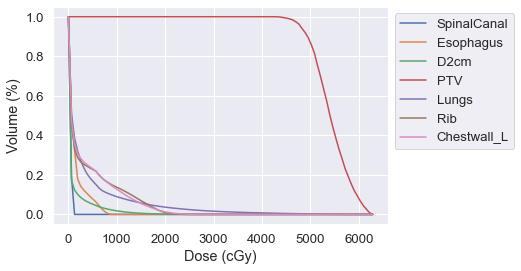

In [9]:
# Dose-volume histograms
result.dvhplot()

In [10]:
# Utility function values
lin = result.get_utility('linear')[0]
lin_quad = result.get_utility('linear_quadratic')[0]
print(f"Linear: {lin:.2f}, Linear-Quadratic: {lin_quad:.2f}")

Linear: 447.82, Linear-Quadratic: -659.80
